# About Dataset #
<p> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).</P>

## About this file ##

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#import-1">Import Libraries</a>
    </li>
    <br>
    <li>
        <a href="#import-2">Import dataset</a>
    </li>
    <br>
    <li>
        <a href="#clean">Data Cleaning</a>
    </li>
    <br>
    <li>
        <a href="#EDA">EDA</a>
    </li>
    <br>
    <li>
        <a href="#prep">Data Preprocessing</a>
    </li>
    <br>
    <li>
        <a href="#model">Model Selection and Training</a>
    </li>
    <br>
    <li>
        <a href="#deploy">Model Deploying</a>
    </li>
</ol>

<hr id="import-1">

<h2>1. Import the Libraries</h2>

In [4]:
import numpy as np
import pandas as pd


#EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style("darkgrid")

import warnings 
warnings.filterwarnings('ignore')

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



<hr id="import-2">

<h2>2. Importing Datasets</h2>

In [5]:
data=pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<hr id='clean'>

<h2>3. Data CLeaning</h2>

In [7]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Handling Duplicates

In [9]:
data.duplicated().sum()

0

Handling Missing Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

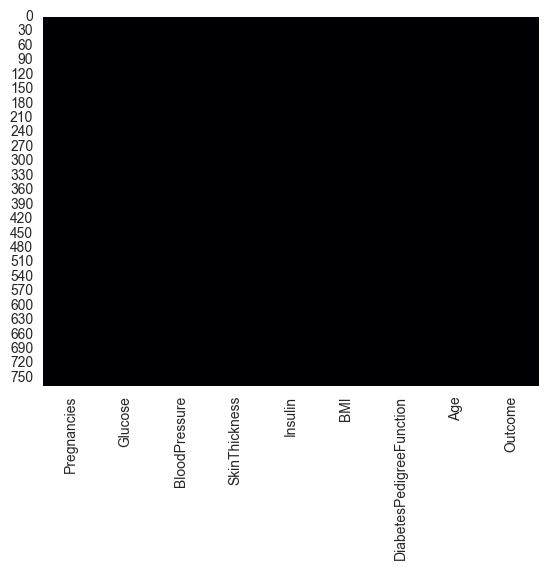

In [10]:
import seaborn as sns

print (data.isnull().sum())
sns.heatmap(data.isnull(), cmap='magma', cbar=False)

Check the features with 0 value

In [11]:
zero_counts = data.eq(0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [12]:
data['Glucose'] = data['Glucose'].replace(0, np.median(data['Glucose']))
data['BloodPressure'] = data['BloodPressure'].replace(0, np.median(data['BloodPressure']))
data['SkinThickness'] = data['SkinThickness'].replace(0, np.median(data['SkinThickness']))
data['Insulin'] = data['Insulin'].replace(0, np.median(data['Insulin']))
data['BMI'] = data['BMI'].replace(0, np.median(data['BMI']))

In [13]:
zero_counts = data.eq(0).sum()
print(zero_counts)


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


<hr  id='EDA'>

<h2>4. Exploratory Data Analysis (EDA)</h2>

In [14]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

<h3>A. Explore Demographic Data</h3>

In [15]:
#Age Distribution of Gym Members 
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Age'], marker_color=plot_color[0]))
fig.update_layout(title='Age Distribution of Diabetes patients ', xaxis_title='Age', yaxis_title='Count')
fig.show()

In [16]:
# Get the counts of each pregnancy count
pregnancy_counts = data['Pregnancies'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=pregnancy_counts.index,
    values=pregnancy_counts.values)])
fig.update_layout(title_text='Pregnancies Distribution')
fig.show()

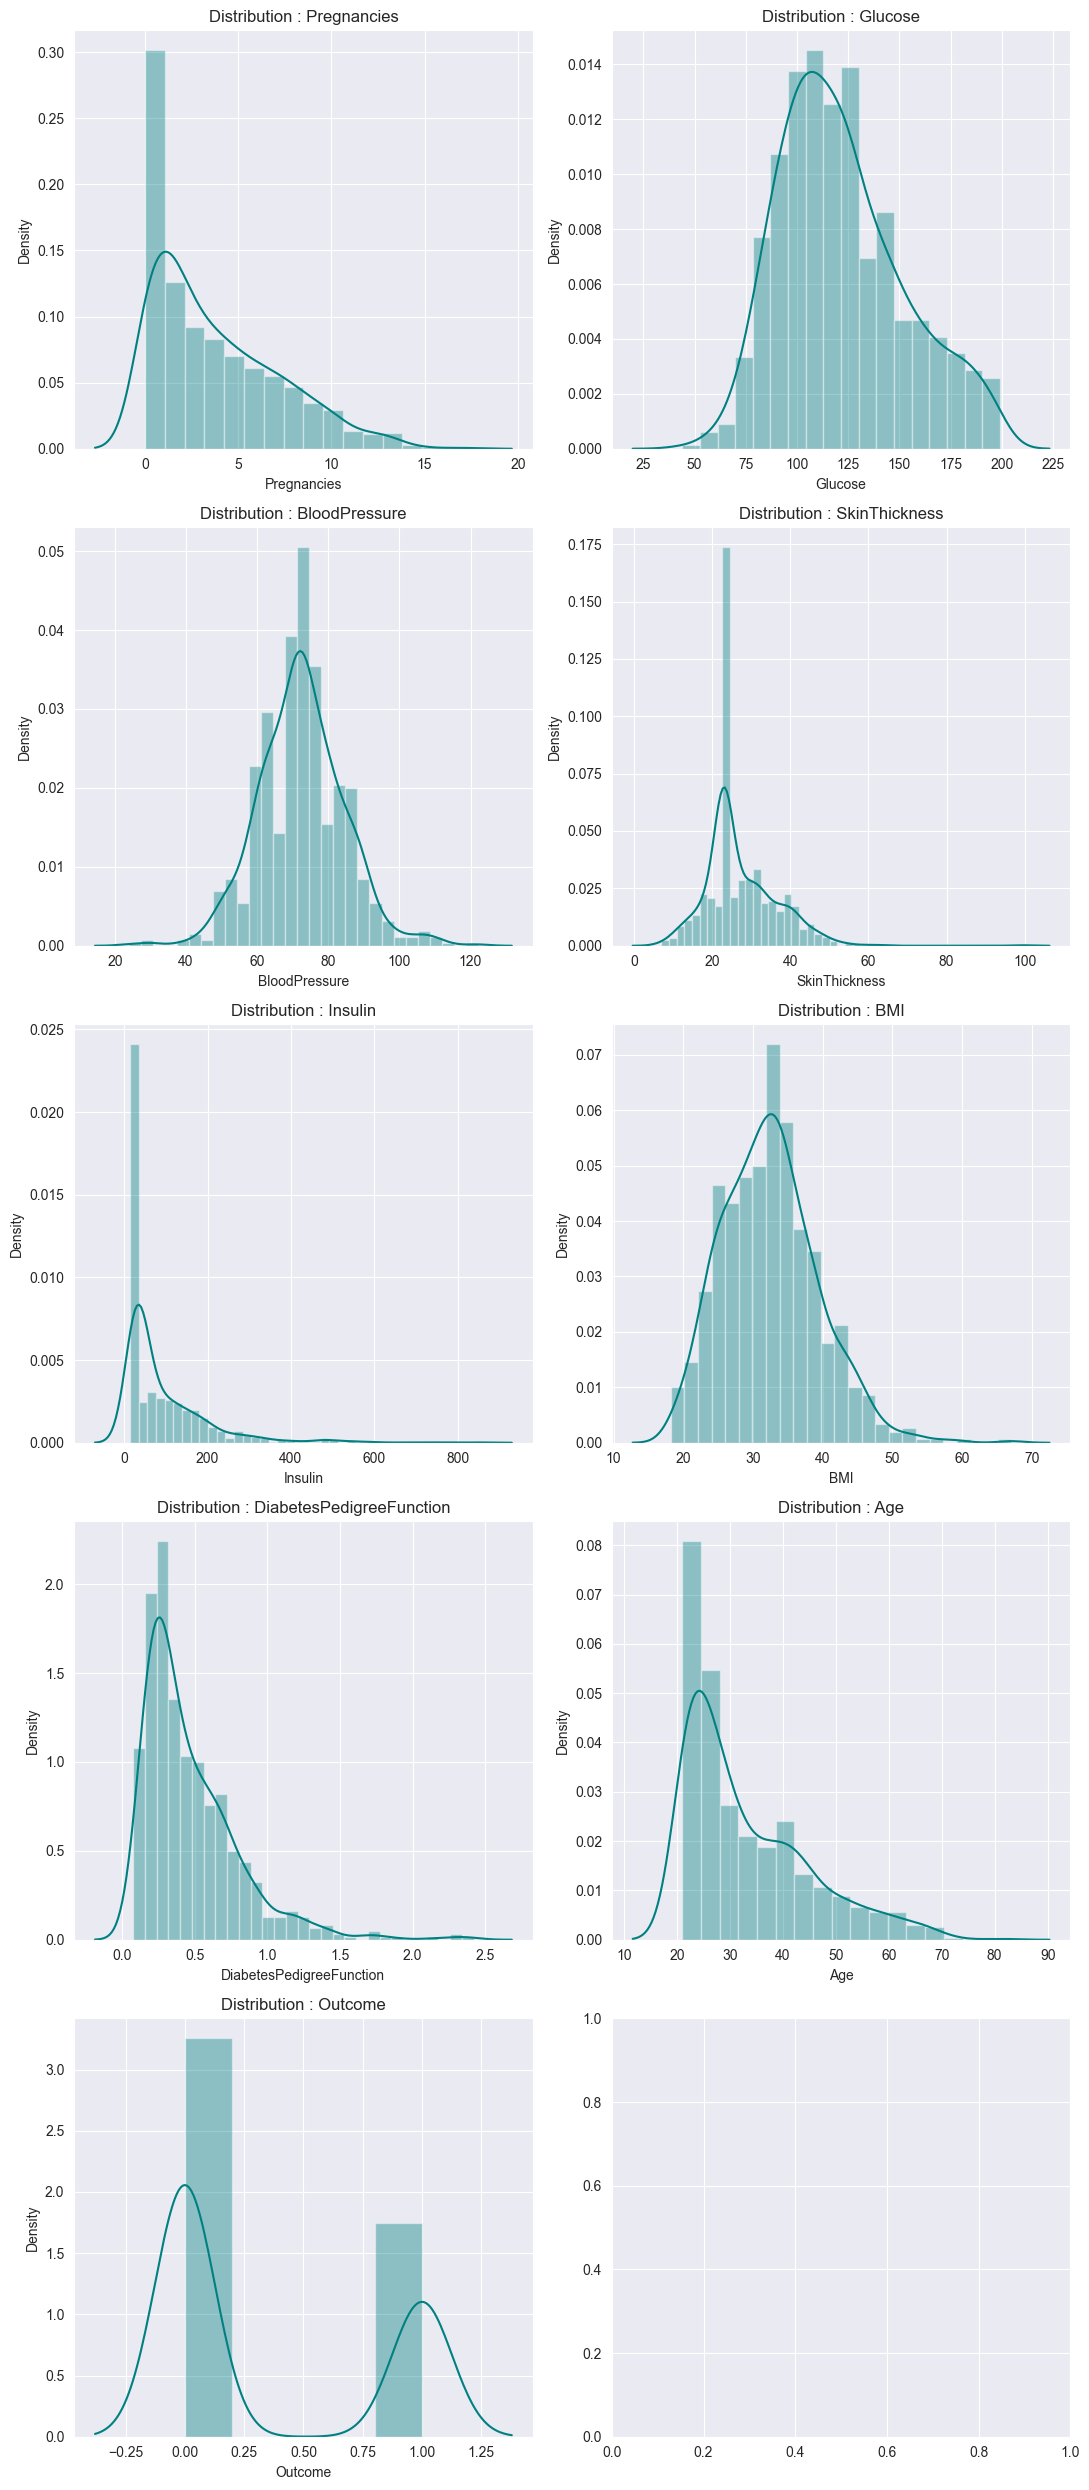

In [17]:
# Define numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Adjust the grid size to accommodate all numerical columns
nrows = (len(numerical_cols) + 1) // 2
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(11, 5 * nrows))
for i in range(len(numerical_cols)):
    plt.subplot(nrows, 2, i + 1)
    sns.distplot(data[numerical_cols[i]])
    title = 'Distribution : ' + numerical_cols[i]
    plt.title(title)
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

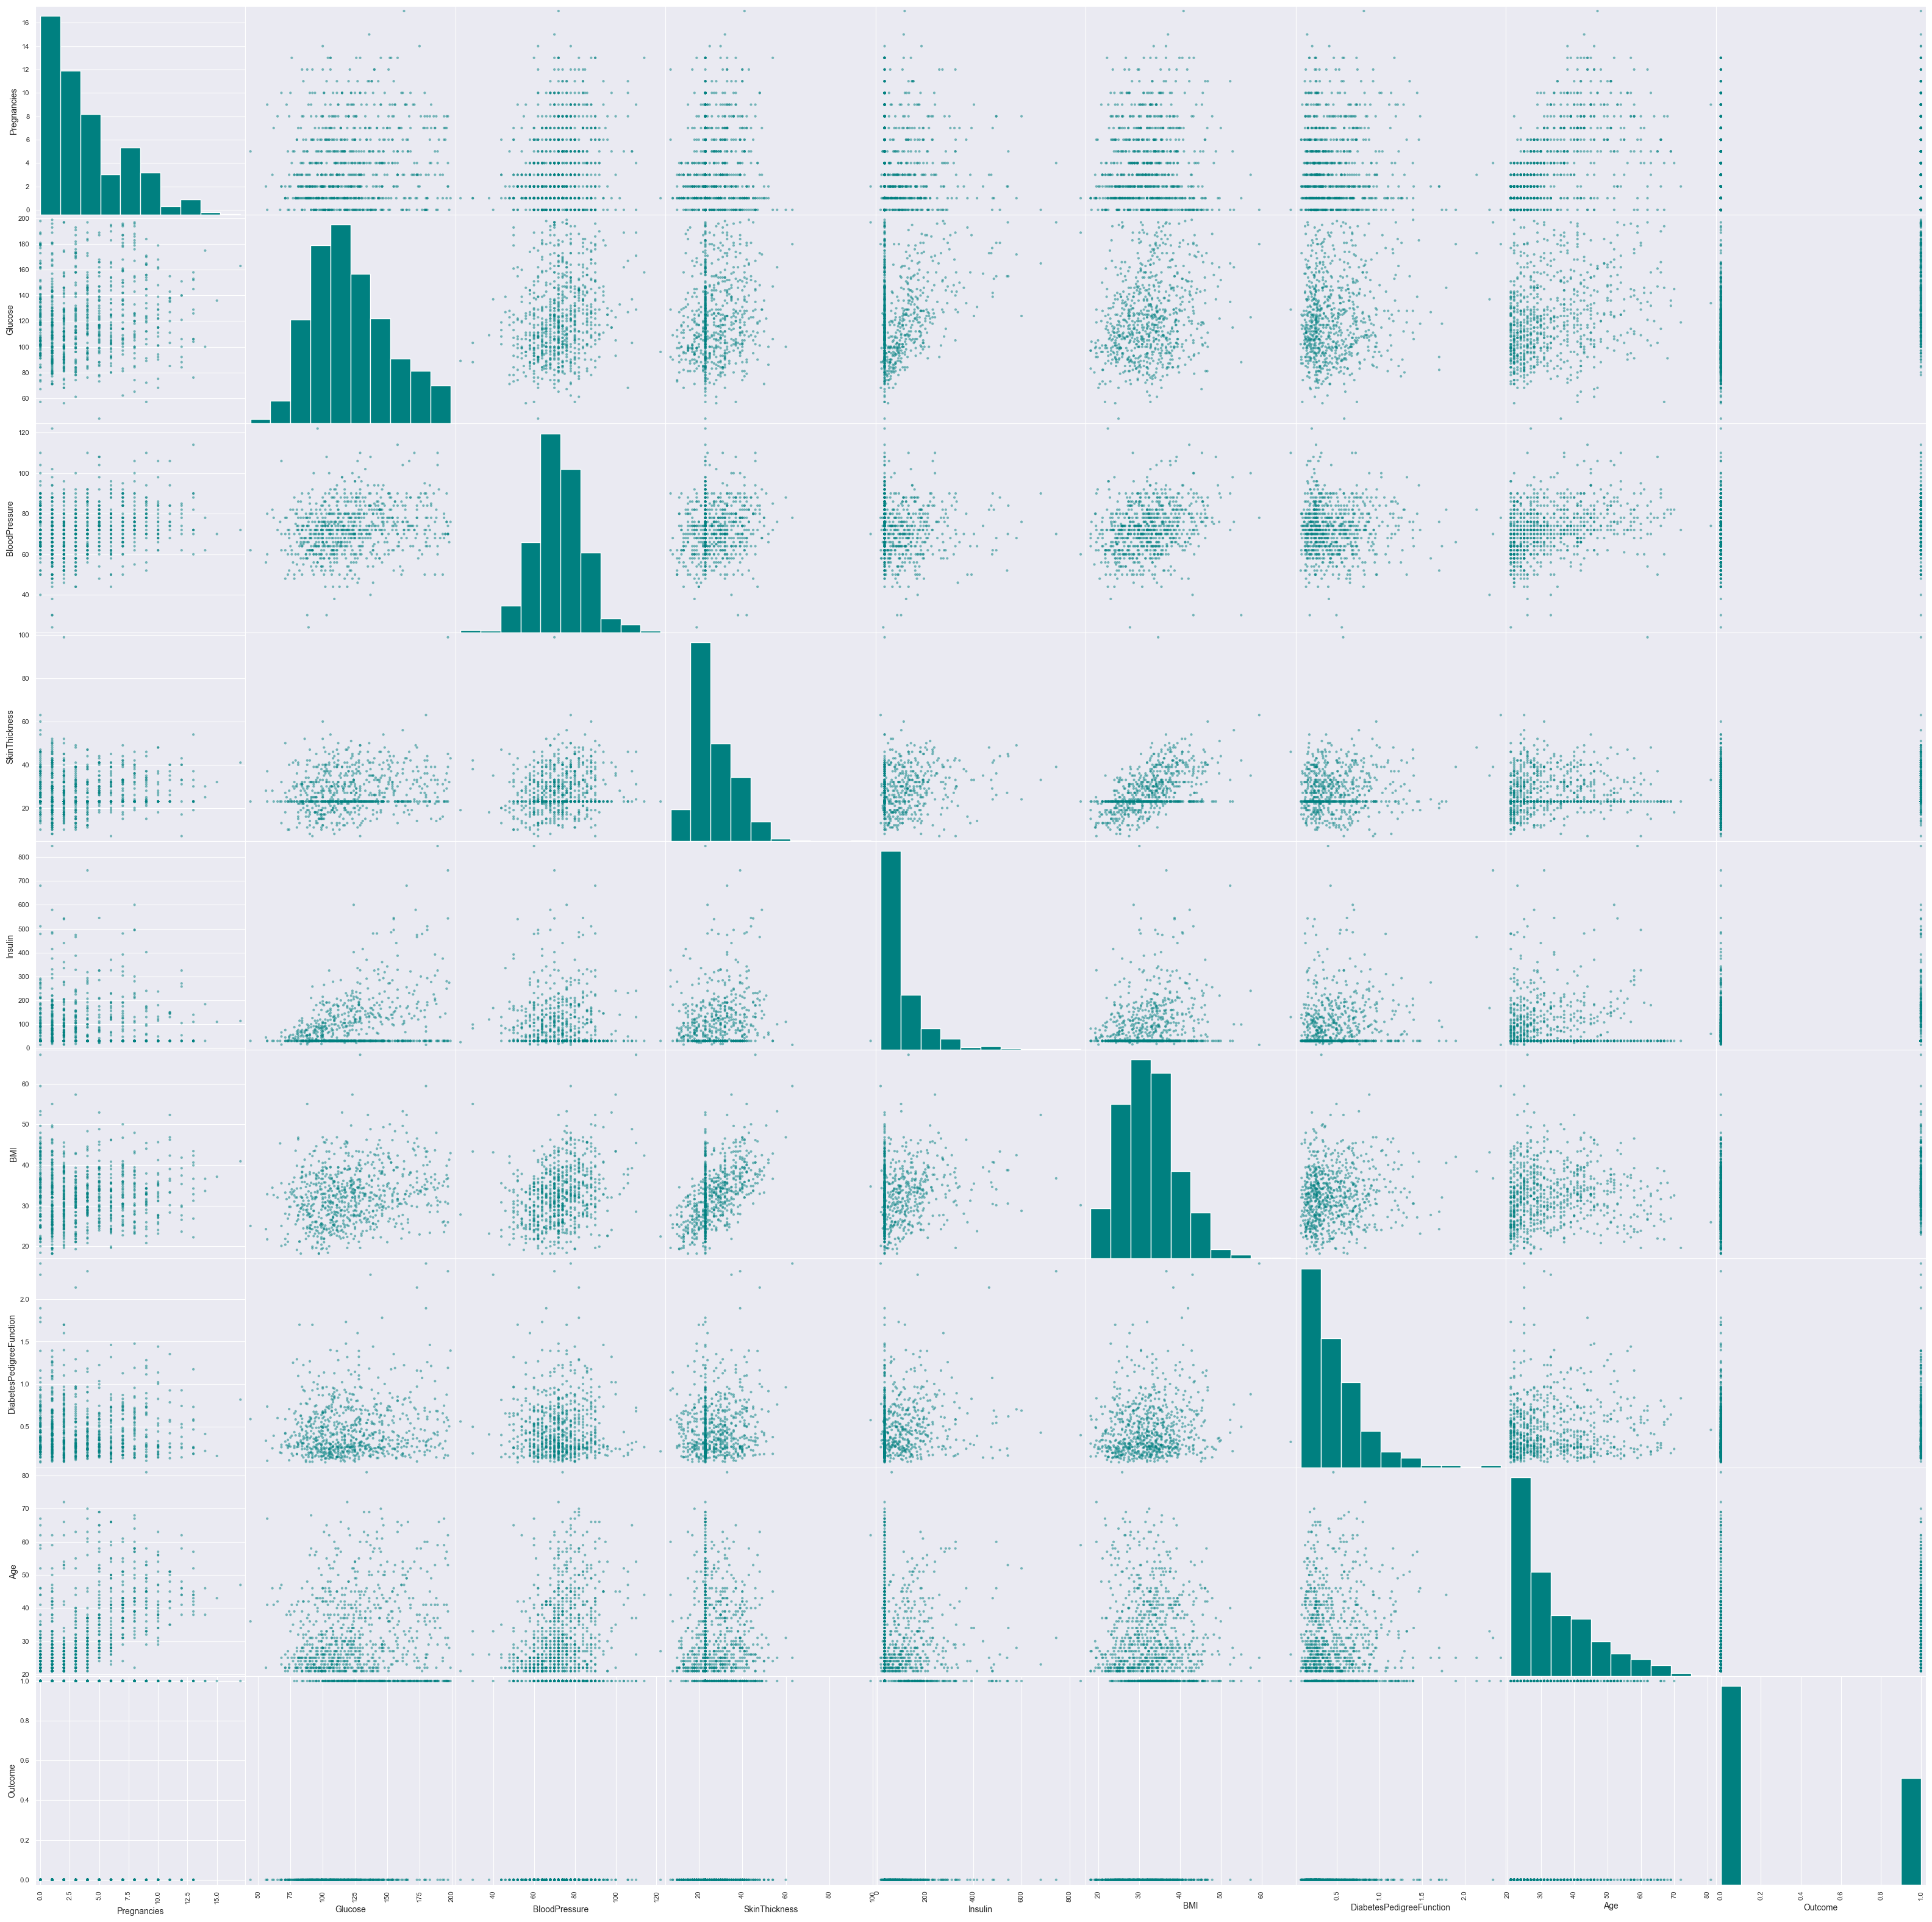

In [18]:
# create a scatter matrix
pd.plotting.scatter_matrix(data, figsize=(40, 40))

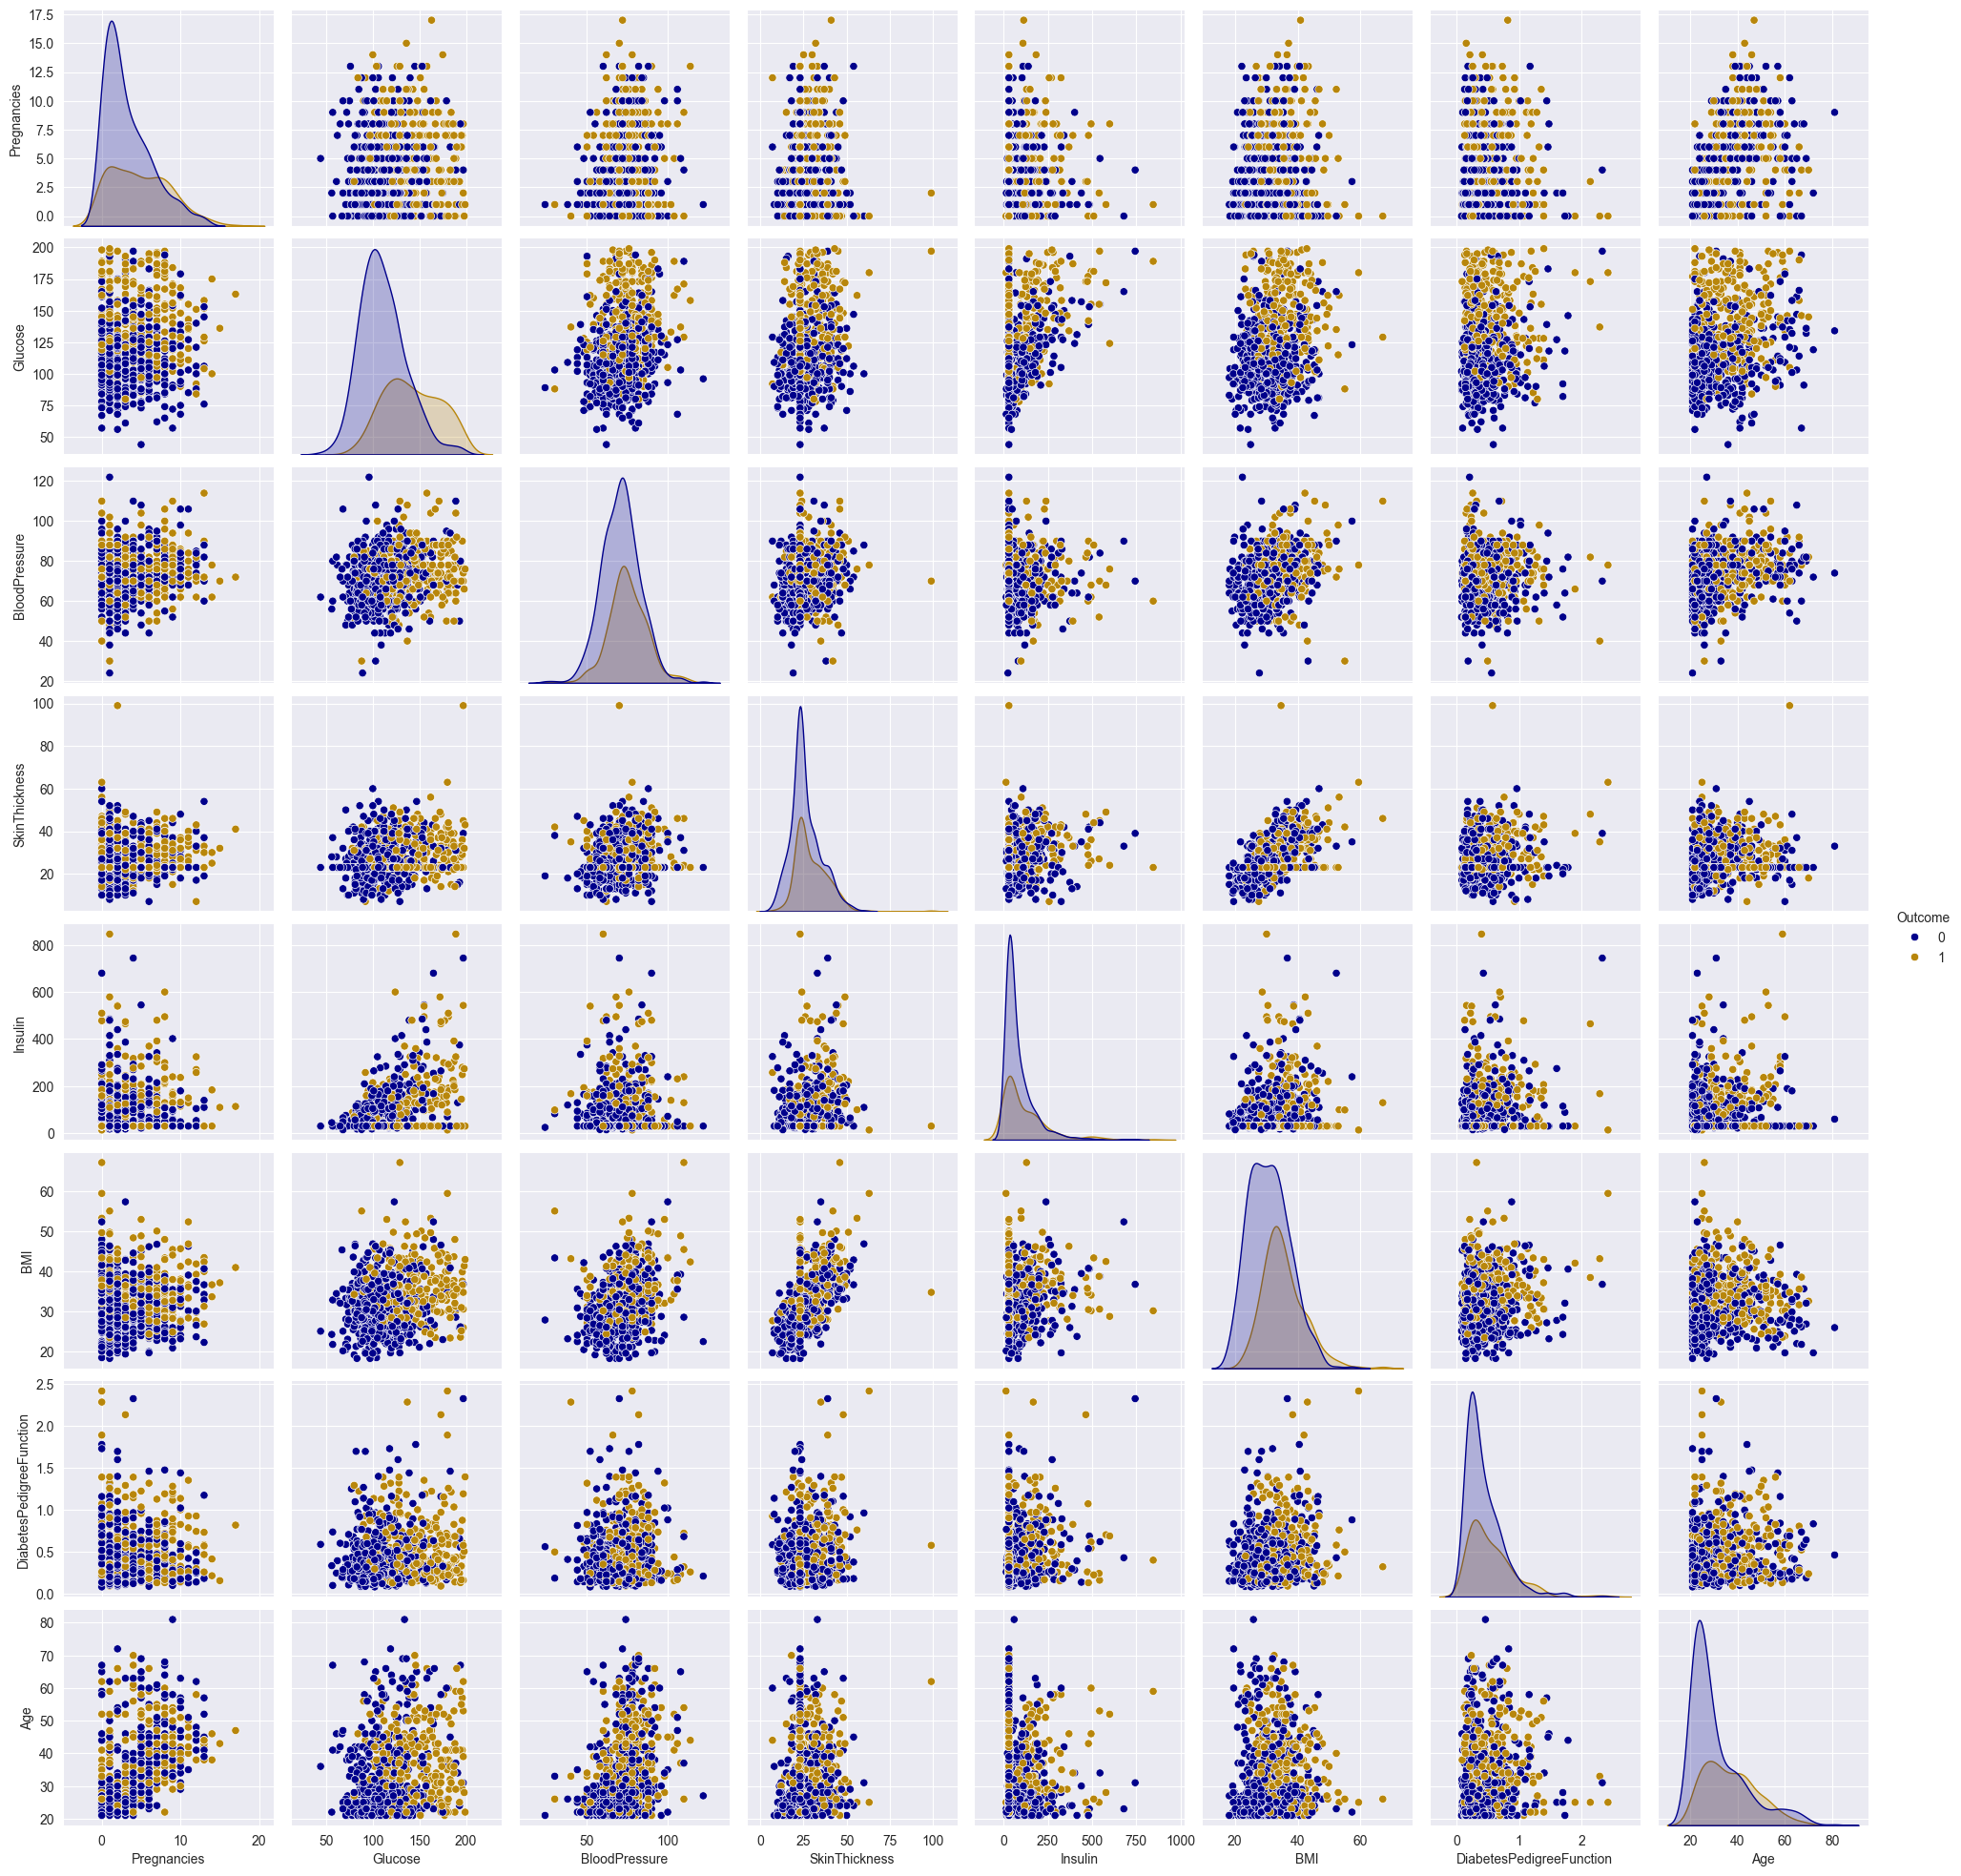

In [19]:
newdf = data
sns.pairplot(data=newdf, hue='Outcome', palette={0: 'darkblue', 1: 'darkgoldenrod'})

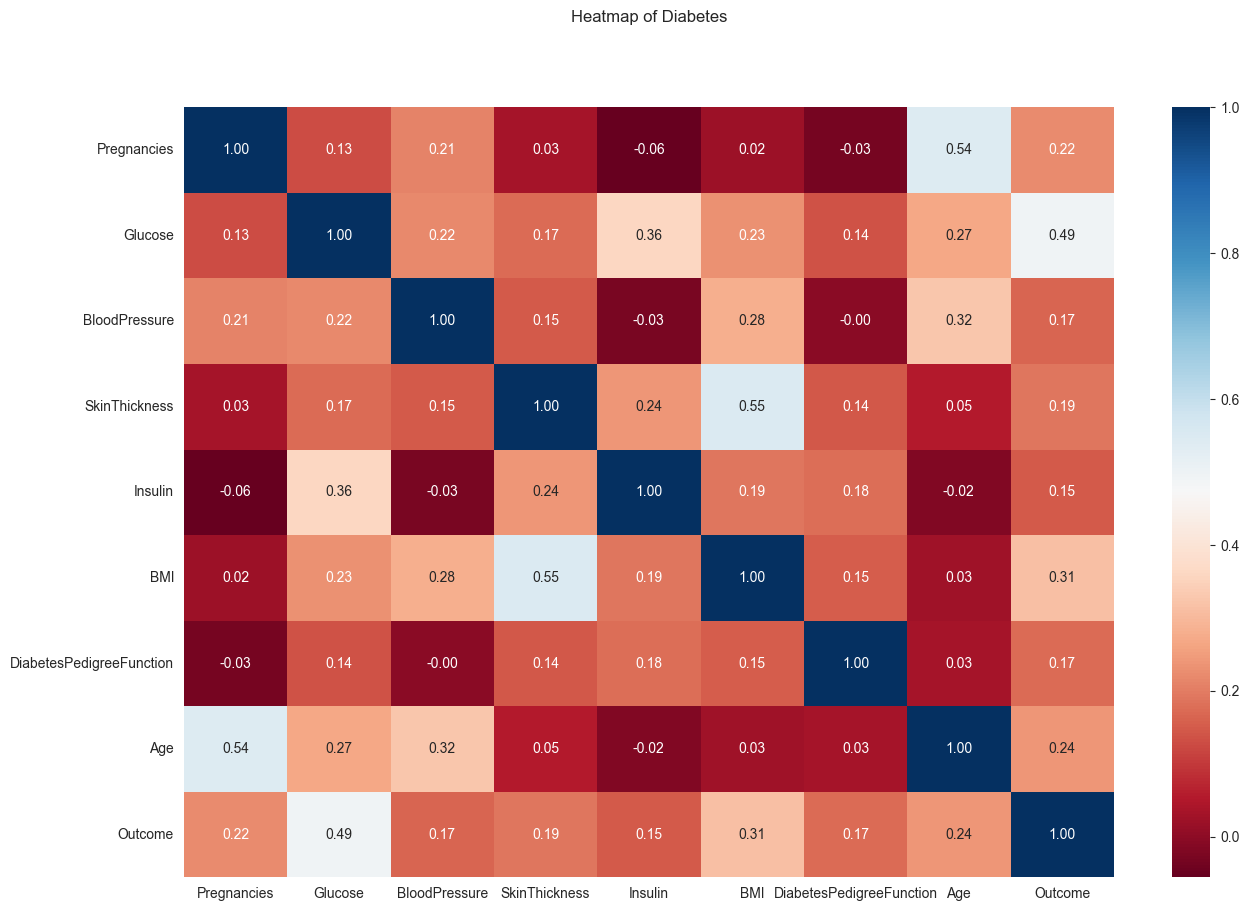

In [20]:
# calculate correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f')
plt.title('Heatmap of Diabetes', y=1.1)
plt.show()

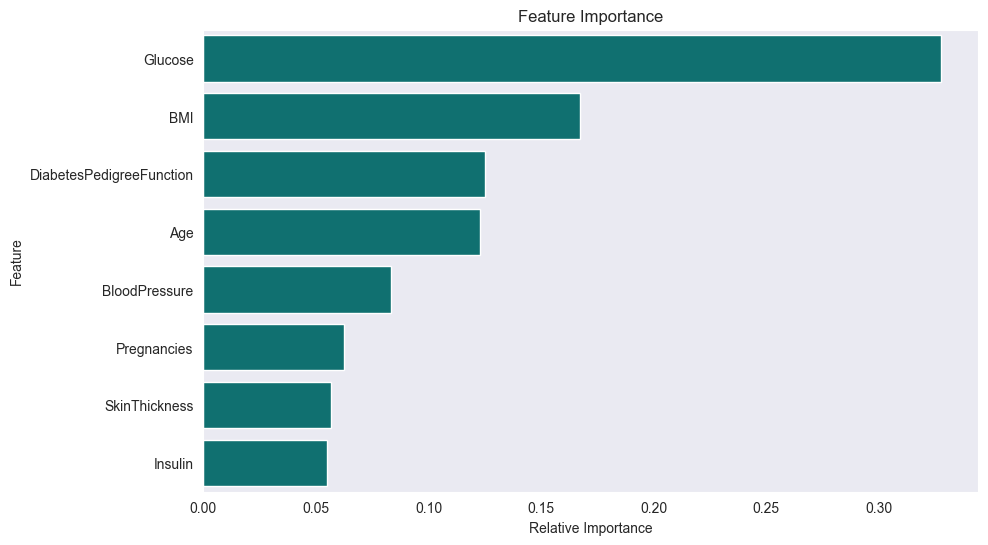

In [21]:
# plot relative feature importance
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

x=data.drop(columns=['Outcome'])
y=data['Outcome']

model = RandomForestRegressor()
model.fit(x, y)
features = pd.Series(model.feature_importances_, index=x.columns)
features.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=features.index)
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

In [22]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

x=StandardScaler().fit_transform(x)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the models and their respective parameter grids
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
        }
    },
    'PolynomialRegression': {
        'model': Pipeline([
            ('poly', PolynomialFeatures()),
            ('model', LinearRegression())
        ]),
        'params': {
            'poly__degree': [2, 3, 4],
            'model__fit_intercept': [True, False],
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear', 'saga']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2],
            'weights': ['uniform', 'distance']
        }
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01]
        }
    },
}

# Initialize the best_estimators dictionary
best_estimators = {}

# Perform grid search for each model
results = []
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    grid_search.fit(x, y)
    best_estimators[model_name] = grid_search.best_estimator_
    results.append({'Algorithm': model_name, 'Best Score': grid_search.best_score_})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


                    Algorithm  Best Score
0            LinearRegression         NaN
1        PolynomialRegression         NaN
2          LogisticRegression    0.769561
3      RandomForestClassifier    0.769570
4  GradientBoostingClassifier    0.768254
5                         KNN    0.713598
6               NeuralNetwork    0.776089


<h3> 1-Linear Regression</h3>

R-squared: 0.27873869354439884
Mean Absolute Error (MAE): 0.335703171660506
Mean Squared Error (MSE): 0.16559570811480634
Root Mean Squared Error (RMSE): 0.4069345255871101


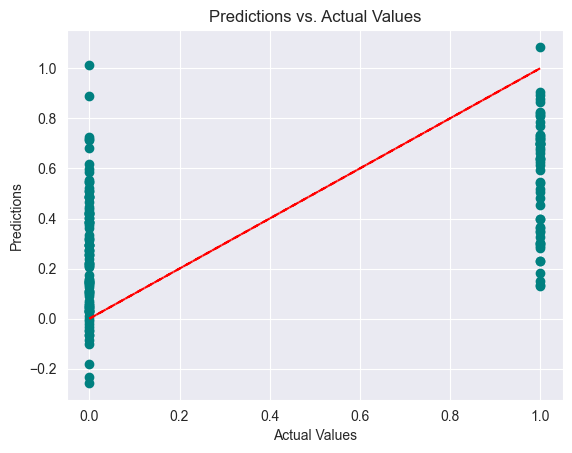

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. create a linear regression model instance
lr = LinearRegression()

x=data.drop('Outcome',axis=1)
y=data['Outcome']
# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model to the training data
lr.fit(x_train, y_train)


# 7. make predictions using the testing set
y_pred = lr.predict(x_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# plot the predictions vs. the actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. Actual Values')
plt.show()

<h3> 2- Poly Regression</h3>

In [ ]:

# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# get the input and output variables
x=data.drop('Outcome',axis=1)
y=data['Outcome']
# create pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# create grid search
param_grid = {
    'poly__degree': [2, 3,4],
}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2')

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

# fit the model
grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters: ', grid.best_params_)
print('Best score: ', grid.best_score_)

Training set:  (614, 8) (614,)
Testing set:  (154, 8) (154,)
Best parameters:  {'poly__degree': 2}
Best score:  0.16731086427499423


<h3> 3- Logistic Regression</h3>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Get the input and output variables
x = data.drop('Outcome', axis=1)
y = data['Outcome']

# Perform grid search with different number of features
feature_importance = features.index.tolist()
results = {}

for i in range(1, len(feature_importance) + 1):
    selected_features = feature_importance[:i]
    x_selected = x[selected_features]
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(x_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Make predictions with the best model
    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(x_test)
    
    # Evaluate the model
    test_score = best_model.score(x_test, y_test)
    results[i] = {
        'features': selected_features,
        'best_params': best_params,
        'best_score': best_score,
        'test_score': test_score,
        'classification_report': classification_report(y_test, y_pred_test)
    }

# Find the number of features with the highest test score
best_num_features = max(results, key=lambda k: results[k]['test_score'])
best_result = results[best_num_features]

# Print the results
print(f"Best number of features: {best_num_features}")
print(f"Selected features: {best_result['features']}")
print(f"Best parameters: {best_result['best_params']}")
print(f"Best cross-validation score: {best_result['best_score']}")
print(f"Test score: {best_result['test_score']}")
print(f"Classification report:\n{best_result['classification_report']}")

Best number of features: 8
Selected features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BloodPressure', 'Pregnancies', 'SkinThickness', 'Insulin']
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.7687591630014661
Test score: 0.7792207792207793
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



<h3>4- KNN </h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 2. create the model
knn = KNeighborsClassifier(n_neighbors=2)

# get the input and output variables
x = data.drop('Outcome', axis=1)
y = data['Outcome']
# 4. pre-process the data (if necessary)
# standardize the data
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', knn)
])

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 6. fit the model
pipe.fit(x_train, y_train)

# 7. make predictions
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

# 8. evaluvate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       402
           1       1.00      0.58      0.73       212

    accuracy                           0.85       614
   macro avg       0.91      0.79      0.81       614
weighted avg       0.88      0.85      0.84       614

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        98
           1       0.62      0.38      0.47        56

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



<h3>5- Decision Tree</h3>

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 1. import the necessary modules for the selected model

# 2. create the model
dtc = DecisionTreeClassifier()

# get the input and output variables
x = data.drop('Outcome', axis=1)
y = data['Outcome']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
dtc.fit(x_train, y_train)

# 7. make predictions
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

# 8. evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        99
           1       0.60      0.71      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



<h3>6- Random Forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# get the input and output variables
x=data.drop('Outcome',axis=1)
y=data['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
random = RandomForestClassifier(n_estimators=1000, random_state=42)
random.fit(X_train, y_train)


# Make predictions
y_pred = random.predict(X_test)

# Evaluate model
print("\nModel Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Model Performance:
R2 Score: -0.0465
RMSE: 0.4902


<h3>7- SVM</h3>

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Create the model
svm = SVC()

# Get the input and output variables
x = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
svm.fit(x_train, y_train)

# Make predictions
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

# Evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       401
           1       0.79      0.47      0.59       213

    accuracy                           0.77       614
   macro avg       0.78      0.70      0.72       614
weighted avg       0.78      0.77      0.76       614

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



<h3>8- Gradient Boosting Machines GBM </h3>

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Create the model
gbm = GradientBoostingClassifier()

# Get the input and output variables
x = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
gbm.fit(x_train, y_train)

# Make predictions
y_pred_train = gbm.predict(x_train)
y_pred_test = gbm.predict(x_test)

# Evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       401
           1       0.94      0.85      0.89       213

    accuracy                           0.93       614
   macro avg       0.93      0.91      0.92       614
weighted avg       0.93      0.93      0.93       614

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



<h3>9- Neural Networks</h3> 

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the model
mlp = MLPClassifier(max_iter=1000)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

# Make predictions with the best model
best_mlp = grid_search.best_estimator_
y_pred_train = best_mlp.predict(X_train)
y_pred_test = best_mlp.predict(X_test)

# Evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Best parameters:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Best score:  0.7362521658003465
Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       401
           1       0.65      0.62      0.64       213

    accuracy                           0.75       614
   macro avg       0.73      0.72      0.73       614
weighted avg       0.75      0.75      0.75       614

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        99
           1       0.59      0.60      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

